In [1]:
# Conectar con Google Drive
from google.colab import drive
drive.mount('/content/drive')

%cd "/content/drive/MyDrive/Concentracion AI/Modulo 2 Arq de Deep Learning/Entregable"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Concentracion AI/Modulo 2 Arq de Deep Learning/Entregable


In [2]:
# Importar las librerias a utilizar
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
import pandas as pd

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers

In [3]:
base_dir = 'Flowers'
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

# Preprocesado de imagenes con ImageDataGenerator
datagen = ImageDataGenerator(
          rescale = 1./255,
          rotation_range = 20,
          width_shift_range = 0.5,
          height_shift_range = 0.5)

# Create data generators for training and validation sets
train_generator = datagen.flow_from_directory(
          train_dir,
          target_size = (150, 150),
          batch_size = 32,
          class_mode = 'sparse')

val_datagen = ImageDataGenerator(1./255)

validation_generator = val_datagen.flow_from_directory(
          validation_dir,
          target_size=(150, 150),
          batch_size=32,
          class_mode = 'sparse')

test_datagen = ImageDataGenerator(1./255)

test_generator = test_datagen.flow_from_directory(
          test_dir,
          target_size = (150, 150),
          batch_size = 32,
          class_mode = 'sparse')


Found 1514 images belonging to 4 classes.
Found 424 images belonging to 4 classes.
Found 551 images belonging to 4 classes.


In [4]:
# Tomar VGG16 con un modelo base
from tensorflow.keras.applications import VGG16
base = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Congelar las capas convolusionales
for layer in base.layers:
    layer.trainable = False

In [5]:
# Creación del modelo
model = models.Sequential()
model.add(base)
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(4, activation='softmax'))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 64)                524352    
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 4)                 260       
                                                                 
Total params: 15239300 (58.13 MB)
Trainable params: 524612 (2.00 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [7]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy']
              )

### Entrenamiento

In [8]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch = 47, #train_generator.samples / train_generator.batch_size,
    epochs = 20,
    validation_data = validation_generator,
    validation_steps = 13 #validation_generator.samples / validation_generator.batch_size
)

Epoch 1/20
47/47 [==============================] - ETA: 0s - loss: 1.2242 - accuracy: 0.4447

/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py:1862: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


47/47 [==============================] - 34s 496ms/step - loss: 1.2242 - accuracy: 0.4447 - val_loss: 7.4753 - val_accuracy: 0.5553
Epoch 2/20
47/47 [==============================] - 21s 453ms/step - loss: 0.9903 - accuracy: 0.5762 - val_loss: 9.4036 - val_accuracy: 0.6947
Epoch 3/20
47/47 [==============================] - 20s 438ms/step - loss: 0.8709 - accuracy: 0.6248 - val_loss: 13.5653 - val_accuracy: 0.6827
Epoch 4/20
47/47 [==============================] - 23s 475ms/step - loss: 0.8440 - accuracy: 0.6478 - val_loss: 12.5211 - val_accuracy: 0.7163
Epoch 5/20
47/47 [==============================] - 22s 479ms/step - loss: 0.7733 - accuracy: 0.6788 - val_loss: 11.8421 - val_accuracy: 0.7404
Epoch 6/20
47/47 [==============================] - 21s 453ms/step - loss: 0.7376 - accuracy: 0.7092 - val_loss: 12.9907 - val_accuracy: 0.7380
Epoch 7/20
47/47 [==============================] - 22s 466ms/step - loss: 0.7267 - accuracy: 0.7031 - val_loss: 13.8437 - val_accuracy: 0.7332
Epoch

In [17]:
# Se guarda el modelo
model.save('flowersVGG.h5')

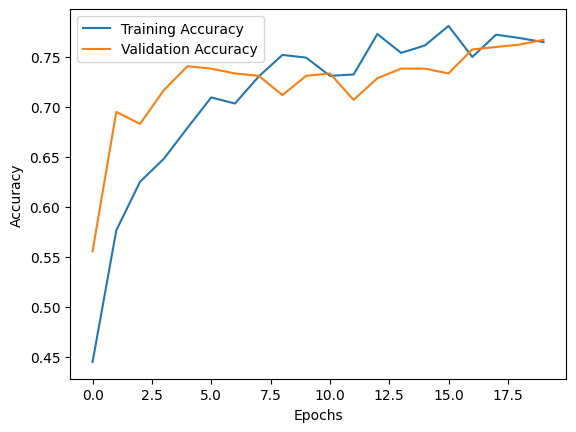

In [10]:
# Grafica del accuracy en train y en validation
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Pruebas

In [11]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [12]:
# Realizar predicciones
prediction = model.predict(test_generator)

# Obtener true labels
true_label = test_generator.classes

# Obtener predicted labels
predicted_label = np.argmax(prediction, axis=1)

/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py:1862: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


18/18 [==============================] - 5s 266ms/step


In [13]:
# Prueba con los datos de test
test_loss, test_acc = model.evaluate(test_generator, steps = 10)
print('\nTest accuracy :\n', test_acc)

10/10 [==============================] - 2s 191ms/step - loss: 20.3408 - accuracy: 0.8219

Test accuracy :
 0.8218749761581421


In [14]:
# Matriz de confusión
cMatrix = confusion_matrix(true_label, predicted_label)

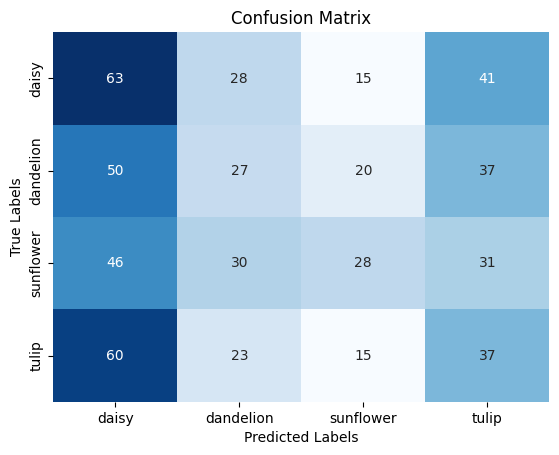

In [15]:
# Grafica de la matriz de confusión
sns.heatmap(cMatrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=test_generator.class_indices,
            yticklabels=test_generator.class_indices)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()